# T1.2 Variables continuas y regla de Bayes

**Problema:** $\;$ Considerad la clasificación de flores iris en setosa o no-setosa a partir de la longitud de pétalos, $x$. El estudio empírico siguiente muestra que las distribuciones de $x$ para setosas y no-setosas pueden aproximarse con distribuciones normales de medias y desviaciones estándares:
$$p(x\mid c=\text{set})\sim\mathcal{N}(\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)%
\qquad\text{y}\qquad%
p(x\mid c=\text{nos})\sim\mathcal{N}(\mu_{\text{nos}}=4.91,\sigma_{\text{nos}}=0.82)$$

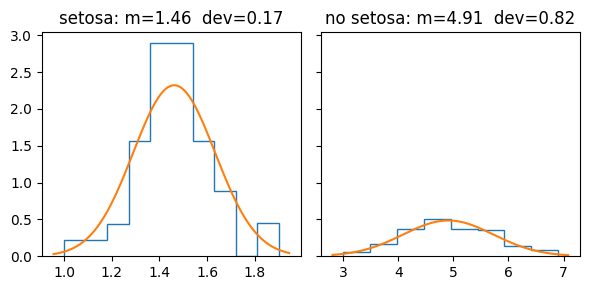

In [1]:
import numpy as np; import matplotlib.pyplot as plt
from sklearn.datasets import load_iris; from scipy.stats import norm
iris = load_iris(); X = iris.data.astype(np.float16); y = iris.target.astype(np.uint)
x_set = np.squeeze(X[np.where(y==0), 2]); x_nos = np.squeeze(X[np.where(y!=0), 2])
fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=True, tight_layout=True)
axs[0].hist(x_set, bins='auto', density=True, histtype='step')
x_set_range = np.arange(*axs[0].get_xlim(), .01)
x_set_mean = x_set.mean(); x_set_dev = np.sqrt(x_set.var())
axs[0].set_title(f'setosa: m={x_set_mean:.2f}  dev={x_set_dev:.2f}')
axs[0].plot(x_set_range, norm.pdf(x_set_range, x_set_mean, x_set_dev))
axs[1].hist(x_nos, bins='auto', density=True, histtype='step')
x_nos_range = np.arange(*axs[1].get_xlim(), .01)
x_nos_mean = x_nos.mean(); x_nos_dev = np.sqrt(x_nos.var())
axs[1].set_title(f'no setosa: m={x_nos_mean:.2f}  dev={x_nos_dev:.2f}')
axs[1].plot(x_nos_range, norm.pdf(x_nos_range, x_nos_mean, x_nos_dev));

**Solución:**
$$\begin{align*}
P&(c=\text{set}\mid x=2)%
=\frac{P(c=\text{set})\,p(x=2\mid c=\text{set})}{p(x=2)}\\
&=\frac{P(c=\text{set})\,p(x=2\mid c=\text{set})}{P(c=\text{set})\,p(x=2\mid c=\text{set})+P(c=\text{nos})\,p(x=2\mid c=\text{nos})}\\
&=\frac{1/3\cdot\mathcal{N}(x=2\mid\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)}{1/3\cdot\mathcal{N}(x=2\mid\mu_{\text{set}}=1.46,\sigma_{\text{set}}=0.17)+2/3\cdot\mathcal{N}(x=2\mid\mu_{\text{nos}}=4.91,\sigma_{\text{nos}}=0.82)}\\
&=\frac{\frac{1}{0.17}\exp\left(-\frac{(2-1.46)^2}{2\cdot 0.17^2}\,\right)}{\frac{1}{0.17}\exp\left(-\frac{(2-1.46)^2}{2\cdot 0.17^2}\,\right)+\frac{2}{0.82}\exp\left(-\frac{(2-4.91)^2}{2\cdot 0.82^2}\,\right)}%
=\frac{0.0379}{0.0379+0.0045}=0.89
\end{align*}$$